In [20]:
import mglearn
import matplotlib.pyplot as plt
import graphviz
import numpy as np
%matplotlib inline

Feature importances: [ 0.  1.]


ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

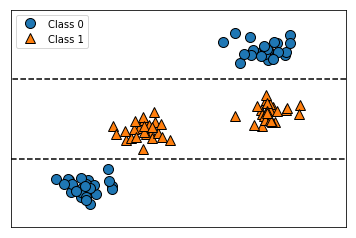

In [16]:
mglearn.plots.plot_tree_not_monotone()

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [11]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

In [12]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [13]:
print('Accuracy of training subset: {:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy of test subset: {:.3f}'.format(tree.score(X_test,y_test)))

Accuracy of training subset: 1.000
Accuracy of test subset: 0.937


In [15]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train, y_train)
print('Accuracy of training subset: {:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy of test subset: {:.3f}'.format(tree.score(X_test,y_test)))

Accuracy of training subset: 0.988
Accuracy of test subset: 0.951


In [18]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree,out_file='F:/NACHIKET/Coursera/Time pass/cancertree.dot',class_names=['malignant','benign'],feature_names=cancer.feature_names,impurity=False,filled=True)

In [22]:
print('Feature importances: {}'.format(tree.feature_importances_))
print(type(tree.feature_importances_))

Feature importances: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]
<class 'numpy.ndarray'>


In [23]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


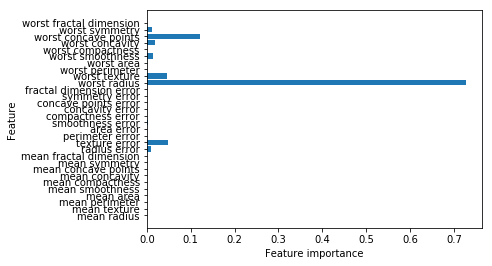

In [24]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features),tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()